In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.font_manager as fm

In [2]:
plt.rc('font' , family = 'NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [3]:
data = pd.read_excel('C:/Users/i5-8250U/Desktop/빅숙타/코로나19 이후 국민의 일상 변화 원본 데이터.xlsx')

In [4]:
data['SQ3_R'].value_counts()

5    235
4    221
2    193
3    186
6    165
Name: SQ3_R, dtype: int64

In [5]:
data['Q22#1'].value_counts()

4    360
7    158
1    133
3    126
2    121
6     41
8     40
5     21
Name: Q22#1, dtype: int64

In [6]:
data['Q22#2'].value_counts()

4    202
3    176
7    170
1    151
8    117
2    112
6     37
5     35
Name: Q22#2, dtype: int64

In [7]:
data['Q22#3'].value_counts()

1    199
7    181
8    163
3    156
4    133
2    114
6     31
5     23
Name: Q22#3, dtype: int64

In [20]:
dict_activity = {'다중이용시설 방문(쇼핑몰, 레스토랑, 헬스장 등)':[133,151,199], '아웃도어 활동(운동, 등산, 캠핑)':[121,115,114],
                '공연, 예술, 영화 관람':[126,176,156],'국내외 여행':[360,202,133],'현장 교육 참가':[21,35,23], '종교 집회 참석':[41,37,31]
                ,'가족 및 지인과의 만남':[158,170,181],'회식 등 사회적 모임':[40,117,163]}
Activity= ['1순위', '2순위', '3순위']

df = pd.DataFrame(dict_activity, index = Activity)
df

,"다중이용시설 방문(쇼핑몰, 레스토랑, 헬스장 등)","아웃도어 활동(운동, 등산, 캠핑)","공연, 예술, 영화 관람",국내외 여행,현장 교육 참가,종교 집회 참석,가족 및 지인과의 만남,회식 등 사회적 모임
1순위,133,121,126,360,21,41,158,40
2순위,151,115,176,202,35,37,170,117
3순위,199,114,156,133,23,31,181,163


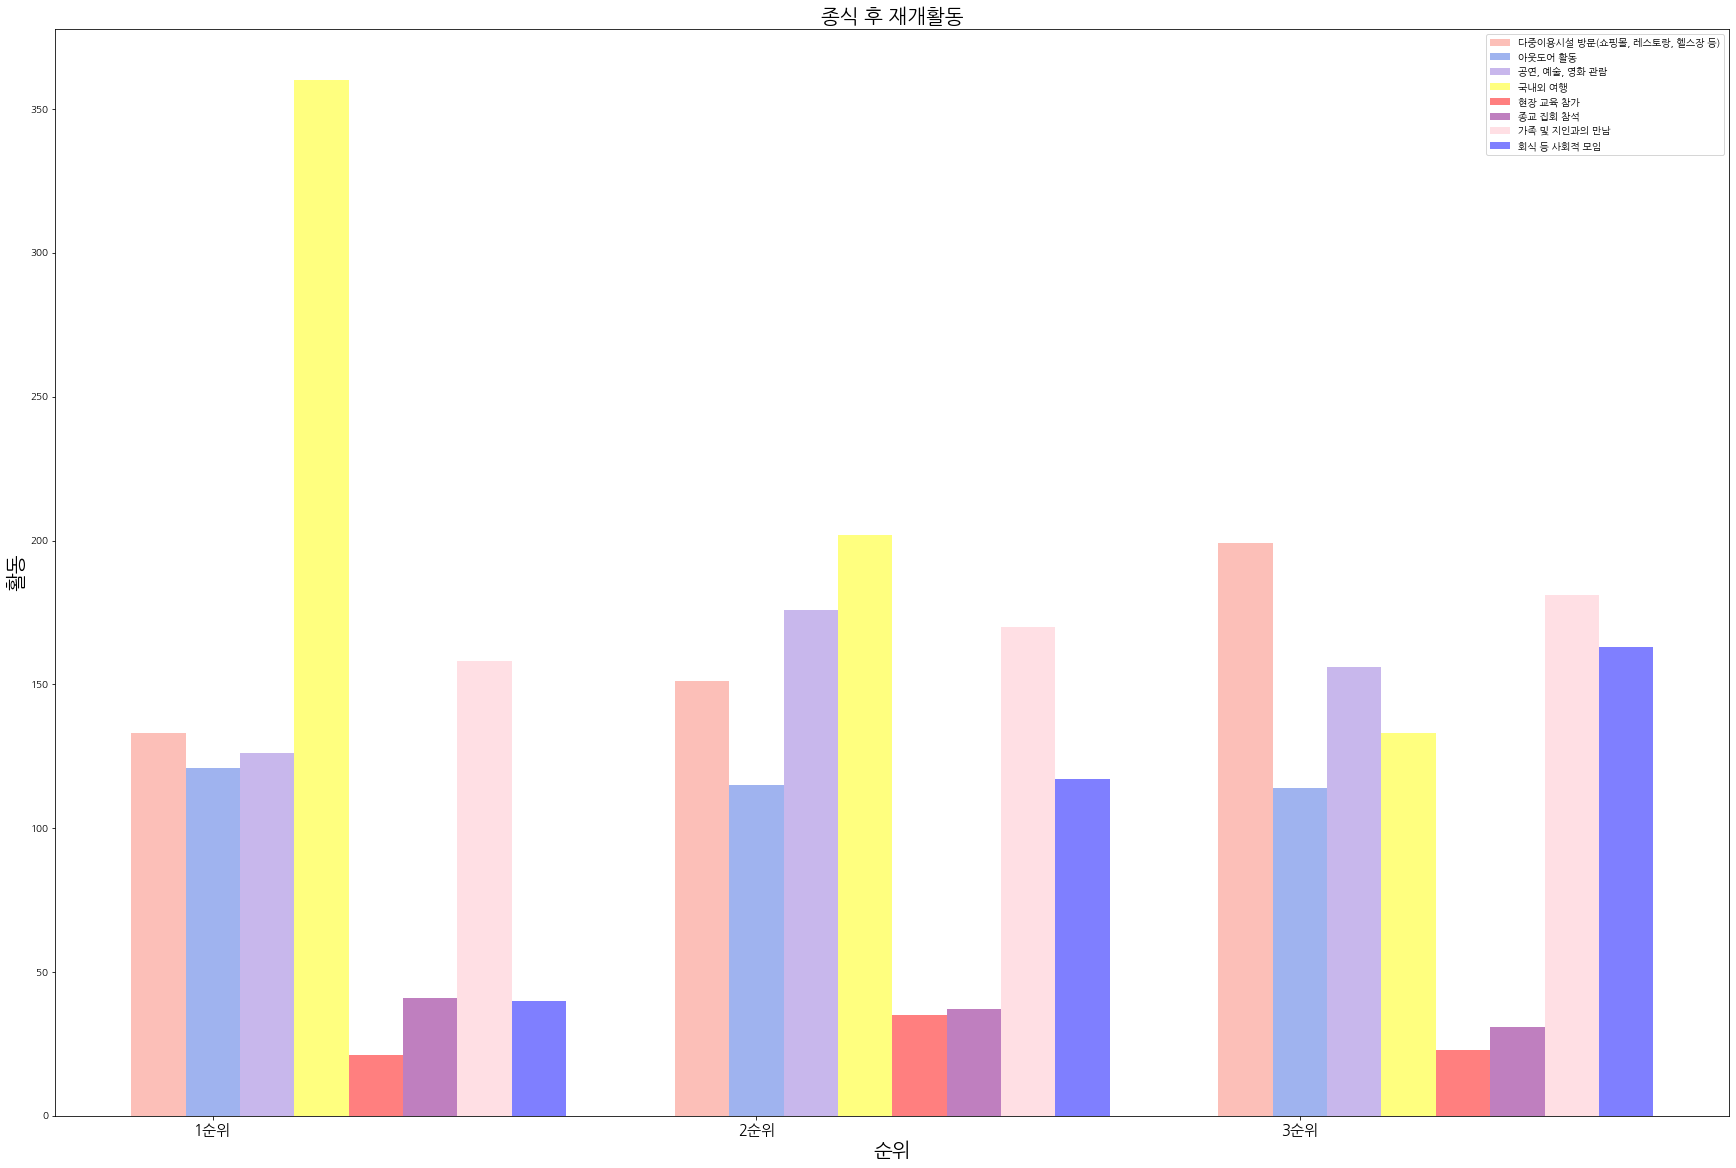

In [46]:
fig, ax = plt.subplots(figsize=(30,20))
bar_width = 0.1

index = np.arange(3)

b1 = plt.bar(index, df['다중이용시설 방문(쇼핑몰, 레스토랑, 헬스장 등)'], bar_width, alpha=0.5, color='salmon', label='다중이용시설 방문(쇼핑몰, 레스토랑, 헬스장 등)')
b2 = plt.bar(index + bar_width, df['아웃도어 활동(운동, 등산, 캠핑)'], bar_width, alpha=0.5, color='royalblue', label='아웃도어 활동')
b3 = plt.bar(index + 2 * bar_width, df['공연, 예술, 영화 관람'], bar_width, alpha=0.5, color='mediumpurple', label='공연, 예술, 영화 관람')
b4 = plt.bar(index + 3 * bar_width, df['국내외 여행'], bar_width, alpha=0.5, color='yellow', label='국내외 여행')
b5 = plt.bar(index + 4 * bar_width, df['현장 교육 참가'], bar_width, alpha=0.5, color='red', label='현장 교육 참가')
b6 = plt.bar(index + 5 * bar_width, df['종교 집회 참석'], bar_width, alpha=0.5, color='purple', label='종교 집회 참석')
b7 = plt.bar(index + 6 * bar_width, df['가족 및 지인과의 만남'], bar_width, alpha=0.5, color='pink', label='가족 및 지인과의 만남')
b8 = plt.bar(index + 7 * bar_width, df['회식 등 사회적 모임'], bar_width, alpha=0.5, color='blue', label='회식 등 사회적 모임')

plt.xticks(np.arange(bar_width, 3+ bar_width, 1), Activity, fontsize=15)

plt.xlabel('순위', size = 20)
plt.ylabel('활동', size = 20)
plt.title('종식 후 재개활동', size=20)

plt.legend()
plt.show()

In [47]:
d1=data[['SQ3_R','Q22#1']]
d2=d1.value_counts().sort_index()
d2

SQ3_R  Q22#1
2      1        32
       2        21
       3        31
       4        67
       5         5
       6         3
       7        28
       8         6
3      1        29
       2        22
       3        29
       4        67
       5         7
       6         6
       7        20
       8         6
4      1        33
       2        20
       3        34
       4        82
       5         5
       6         6
       7        30
       8        11
5      1        25
       2        33
       3        23
       4        86
       5         3
       6        10
       7        47
       8         8
6      1        14
       2        25
       3         9
       4        58
       5         1
       6        16
       7        33
       8         9
dtype: int64

In [53]:
dict_age = {'다중이용시설 방문':[32,29,33,25,14],'아웃도어 활동':[21,22,20,33,25],'공연, 예술, 영화 관람':[31,29,34,23,9], '국내외 여행':[67,67,82,86,58], '현장 교육 참가':[5,7,5,3,1]
           ,'종교 집회 참석':[3,6,6,10,16],'가족 및 지인과의 만남':[28,20,30,47,33],'회식 등 사회적 모임':[6,6,11,8,9]}
Age= ['19~20대', '30대',' 40대', '50대', '60대']

df = pd.DataFrame(dict_age, index = Age)
df

,다중이용시설 방문,아웃도어 활동,"공연, 예술, 영화 관람",국내외 여행,현장 교육 참가,종교 집회 참석,가족 및 지인과의 만남,회식 등 사회적 모임
19~20대,32,21,31,67,5,3,28,6
30대,29,22,29,67,7,6,20,6
40대,33,20,34,82,5,6,30,11
50대,25,33,23,86,3,10,47,8
60대,14,25,9,58,1,16,33,9


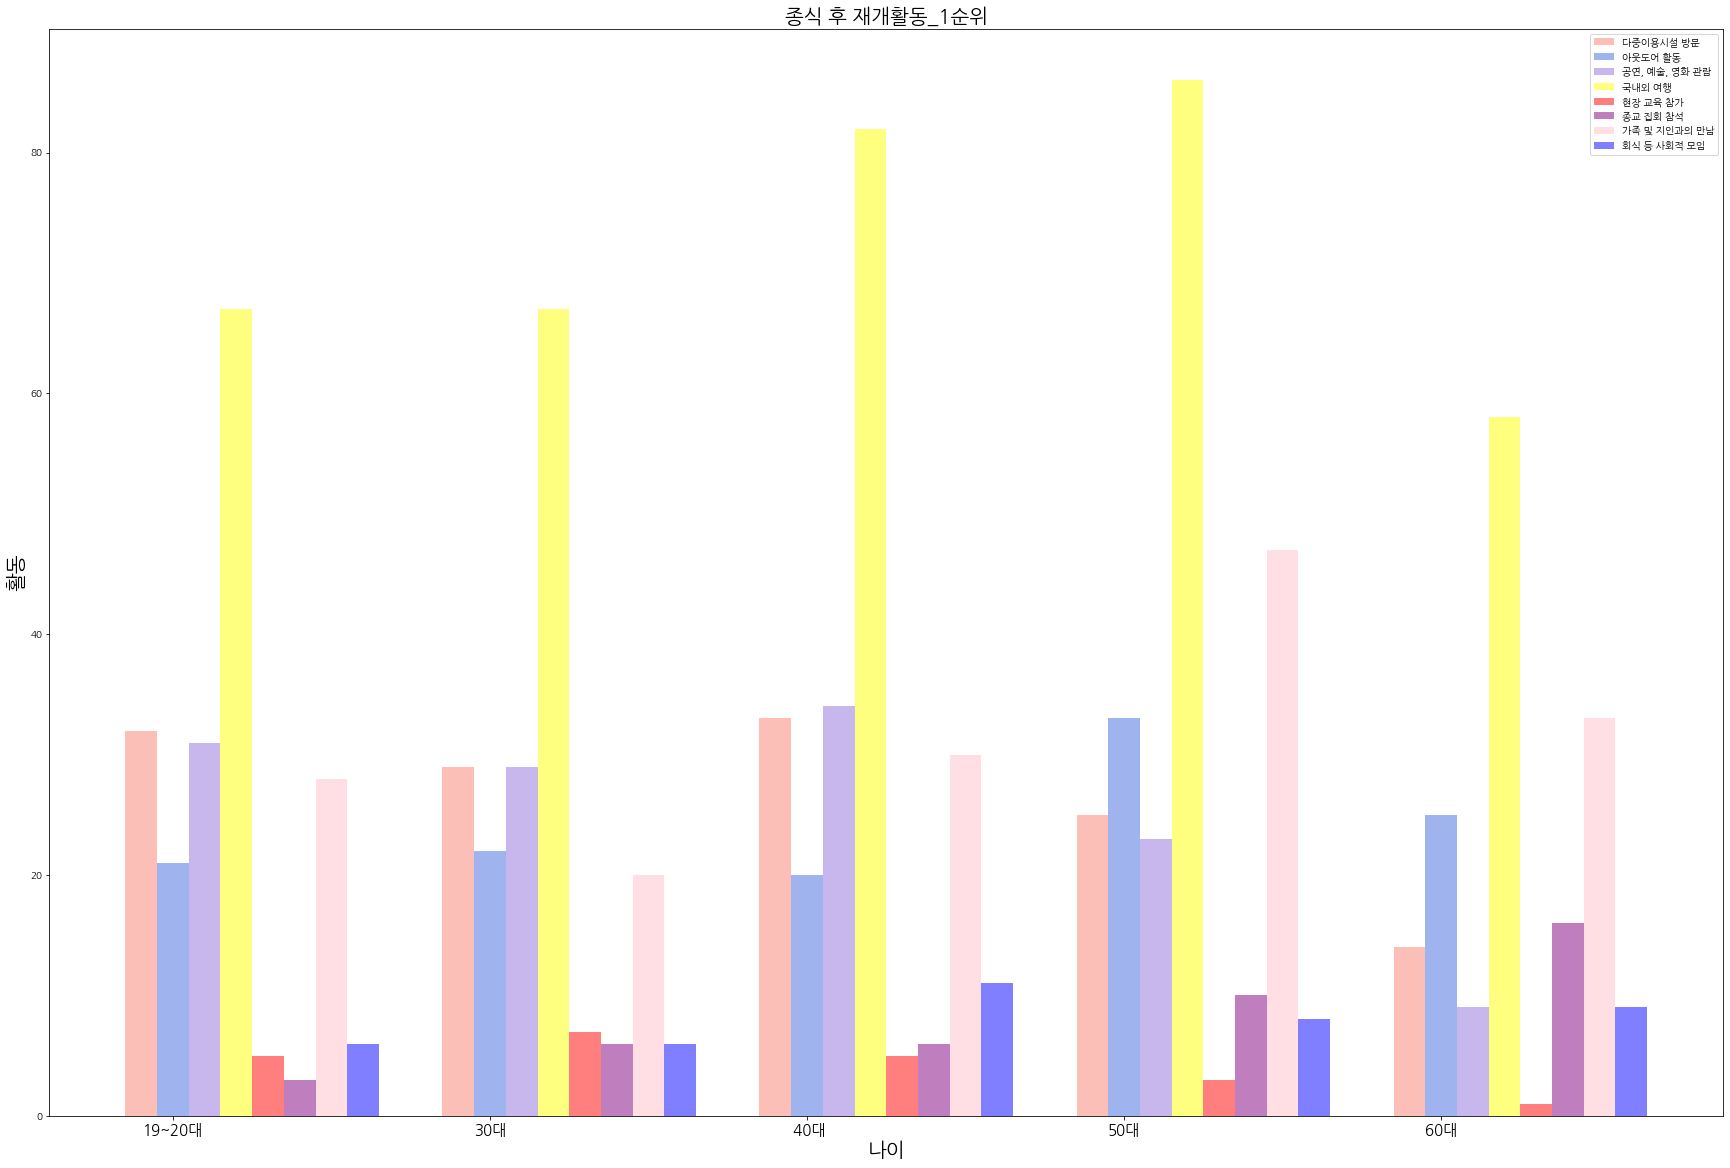

In [55]:
fig, ax = plt.subplots(figsize=(30,20))
bar_width = 0.1

index = np.arange(5)

b1 = plt.bar(index, df['다중이용시설 방문'], bar_width, alpha=0.5, color='salmon', label='다중이용시설 방문')
b2 = plt.bar(index + bar_width, df['아웃도어 활동'], bar_width, alpha=0.5, color='royalblue', label='아웃도어 활동')
b3 = plt.bar(index + 2 * bar_width, df['공연, 예술, 영화 관람'], bar_width, alpha=0.5, color='mediumpurple', label='공연, 예술, 영화 관람')
b4 = plt.bar(index + 3 * bar_width, df['국내외 여행'], bar_width, alpha=0.5, color='yellow', label='국내외 여행')
b5 = plt.bar(index + 4 * bar_width, df['현장 교육 참가'], bar_width, alpha=0.5, color='red', label='현장 교육 참가')
b6 = plt.bar(index + 5 * bar_width, df['종교 집회 참석'], bar_width, alpha=0.5, color='purple', label='종교 집회 참석')
b7 = plt.bar(index + 6 * bar_width, df['가족 및 지인과의 만남'], bar_width, alpha=0.5, color='pink', label='가족 및 지인과의 만남')
b8 = plt.bar(index + 7 * bar_width, df['회식 등 사회적 모임'], bar_width, alpha=0.5, color='blue', label='회식 등 사회적 모임')

plt.xticks(np.arange(bar_width, 5+ bar_width, 1), Age, fontsize=15)

plt.xlabel('나이', size = 20)
plt.ylabel('활동', size = 20)
plt.title('종식 후 재개활동_1순위', size=20)

plt.legend()
plt.show()

In [56]:
d1=data[['SQ3_R','Q22#2']]
d2=d1.value_counts().sort_index()
d2

SQ3_R  Q22#2
2      1        38
       2        13
       3        44
       4        36
       5         9
       6         7
       7        31
       8        15
3      1        29
       2        25
       3        37
       4        39
       5        12
       6         5
       7        29
       8        10
4      1        37
       2        33
       3        40
       4        46
       5         2
       6         5
       7        34
       8        24
5      1        31
       2        22
       3        31
       4        48
       5         8
       6        12
       7        41
       8        42
6      1        16
       2        19
       3        24
       4        33
       5         4
       6         8
       7        35
       8        26
dtype: int64

In [57]:
dict_age = {'다중이용시설 방문':[38,29,37,31,16],'아웃도어 활동':[13,25,33,22,19],'공연, 예술, 영화 관람':[44,37,40,31,24], '국내외 여행':[36,39,46,48,33], '현장 교육 참가':[9,12,2,8,4]
           ,'종교 집회 참석':[7,5,5,12,8],'가족 및 지인과의 만남':[31,29,34,41,35],'회식 등 사회적 모임':[15,10,24,42,26]}
Age= ['19~20대', '30대',' 40대', '50대', '60대']

df = pd.DataFrame(dict_age, index = Age)
df

,다중이용시설 방문,아웃도어 활동,"공연, 예술, 영화 관람",국내외 여행,현장 교육 참가,종교 집회 참석,가족 및 지인과의 만남,회식 등 사회적 모임
19~20대,38,13,44,36,9,7,31,15
30대,29,25,37,39,12,5,29,10
40대,37,33,40,46,2,5,34,24
50대,31,22,31,48,8,12,41,42
60대,16,19,24,33,4,8,35,26


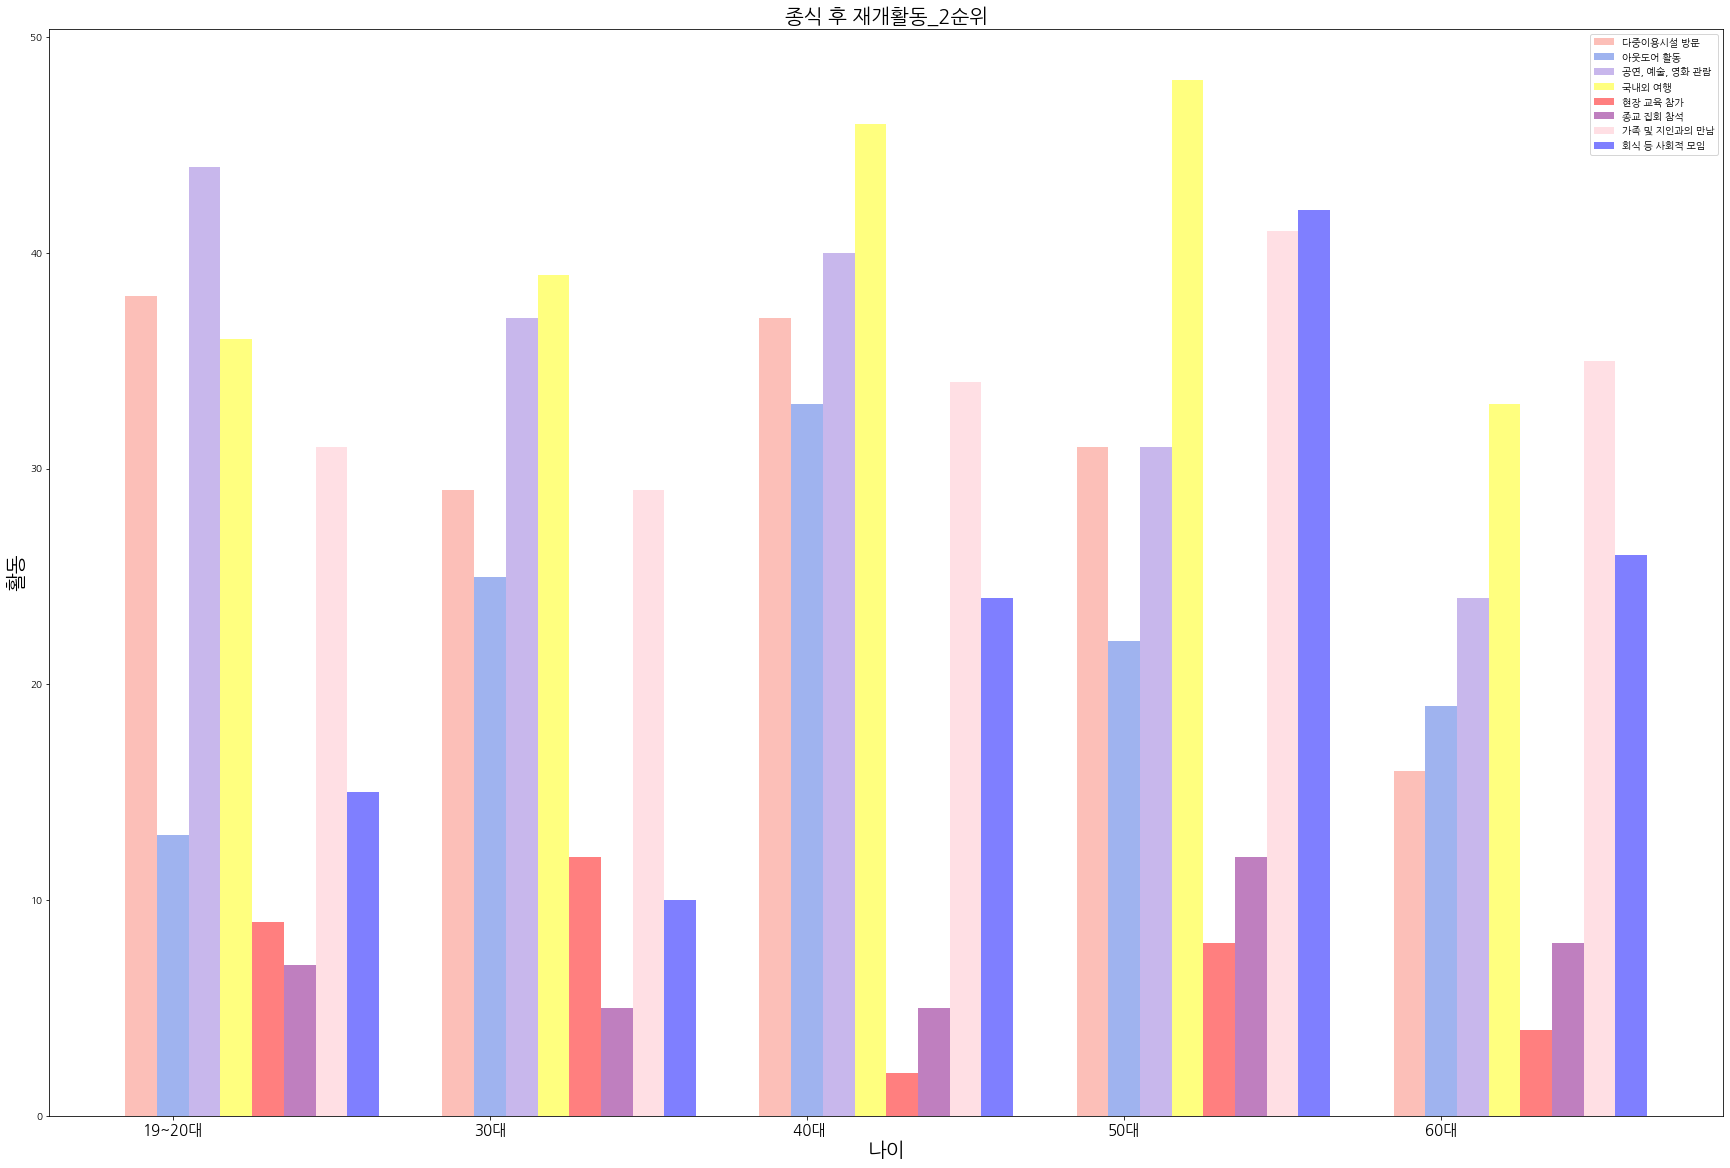

In [58]:
fig, ax = plt.subplots(figsize=(30,20))
bar_width = 0.1

index = np.arange(5)

b1 = plt.bar(index, df['다중이용시설 방문'], bar_width, alpha=0.5, color='salmon', label='다중이용시설 방문')
b2 = plt.bar(index + bar_width, df['아웃도어 활동'], bar_width, alpha=0.5, color='royalblue', label='아웃도어 활동')
b3 = plt.bar(index + 2 * bar_width, df['공연, 예술, 영화 관람'], bar_width, alpha=0.5, color='mediumpurple', label='공연, 예술, 영화 관람')
b4 = plt.bar(index + 3 * bar_width, df['국내외 여행'], bar_width, alpha=0.5, color='yellow', label='국내외 여행')
b5 = plt.bar(index + 4 * bar_width, df['현장 교육 참가'], bar_width, alpha=0.5, color='red', label='현장 교육 참가')
b6 = plt.bar(index + 5 * bar_width, df['종교 집회 참석'], bar_width, alpha=0.5, color='purple', label='종교 집회 참석')
b7 = plt.bar(index + 6 * bar_width, df['가족 및 지인과의 만남'], bar_width, alpha=0.5, color='pink', label='가족 및 지인과의 만남')
b8 = plt.bar(index + 7 * bar_width, df['회식 등 사회적 모임'], bar_width, alpha=0.5, color='blue', label='회식 등 사회적 모임')

plt.xticks(np.arange(bar_width, 5+ bar_width, 1), Age, fontsize=15)

plt.xlabel('나이', size = 20)
plt.ylabel('활동', size = 20)
plt.title('종식 후 재개활동_2순위', size=20)

plt.legend()
plt.show()

In [59]:
d1=data[['SQ3_R','Q22#3']]
d2=d1.value_counts().sort_index()
d2

SQ3_R  Q22#3
2      1        40
       2        24
       3        35
       4        27
       5         6
       6         5
       7        27
       8        29
3      1        46
       2        16
       3        35
       4        24
       6         7
       7        34
       8        24
4      1        42
       2        29
       3        43
       4        29
       5         6
       6         5
       7        38
       8        29
5      1        41
       2        31
       3        23
       4        28
       5         7
       6         8
       7        47
       8        50
6      1        30
       2        14
       3        20
       4        25
       5         4
       6         6
       7        35
       8        31
dtype: int64

In [60]:
dict_age = {'다중이용시설 방문':[40,46,42,41,30],'아웃도어 활동':[24,16,29,31,14],'공연, 예술, 영화 관람':[35,35,43,23,20], '국내외 여행':[27,24,29,28,25], '현장 교육 참가':[6,0,6,7,4]
           ,'종교 집회 참석':[5,7,5,8,6],'가족 및 지인과의 만남':[27,34,38,47,35],'회식 등 사회적 모임':[29,24,29,50,31]}
Age= ['19~20대', '30대',' 40대', '50대', '60대']

df = pd.DataFrame(dict_age, index = Age)
df

,다중이용시설 방문,아웃도어 활동,"공연, 예술, 영화 관람",국내외 여행,현장 교육 참가,종교 집회 참석,가족 및 지인과의 만남,회식 등 사회적 모임
19~20대,40,24,35,27,6,5,27,29
30대,46,16,35,24,0,7,34,24
40대,42,29,43,29,6,5,38,29
50대,41,31,23,28,7,8,47,50
60대,30,14,20,25,4,6,35,31


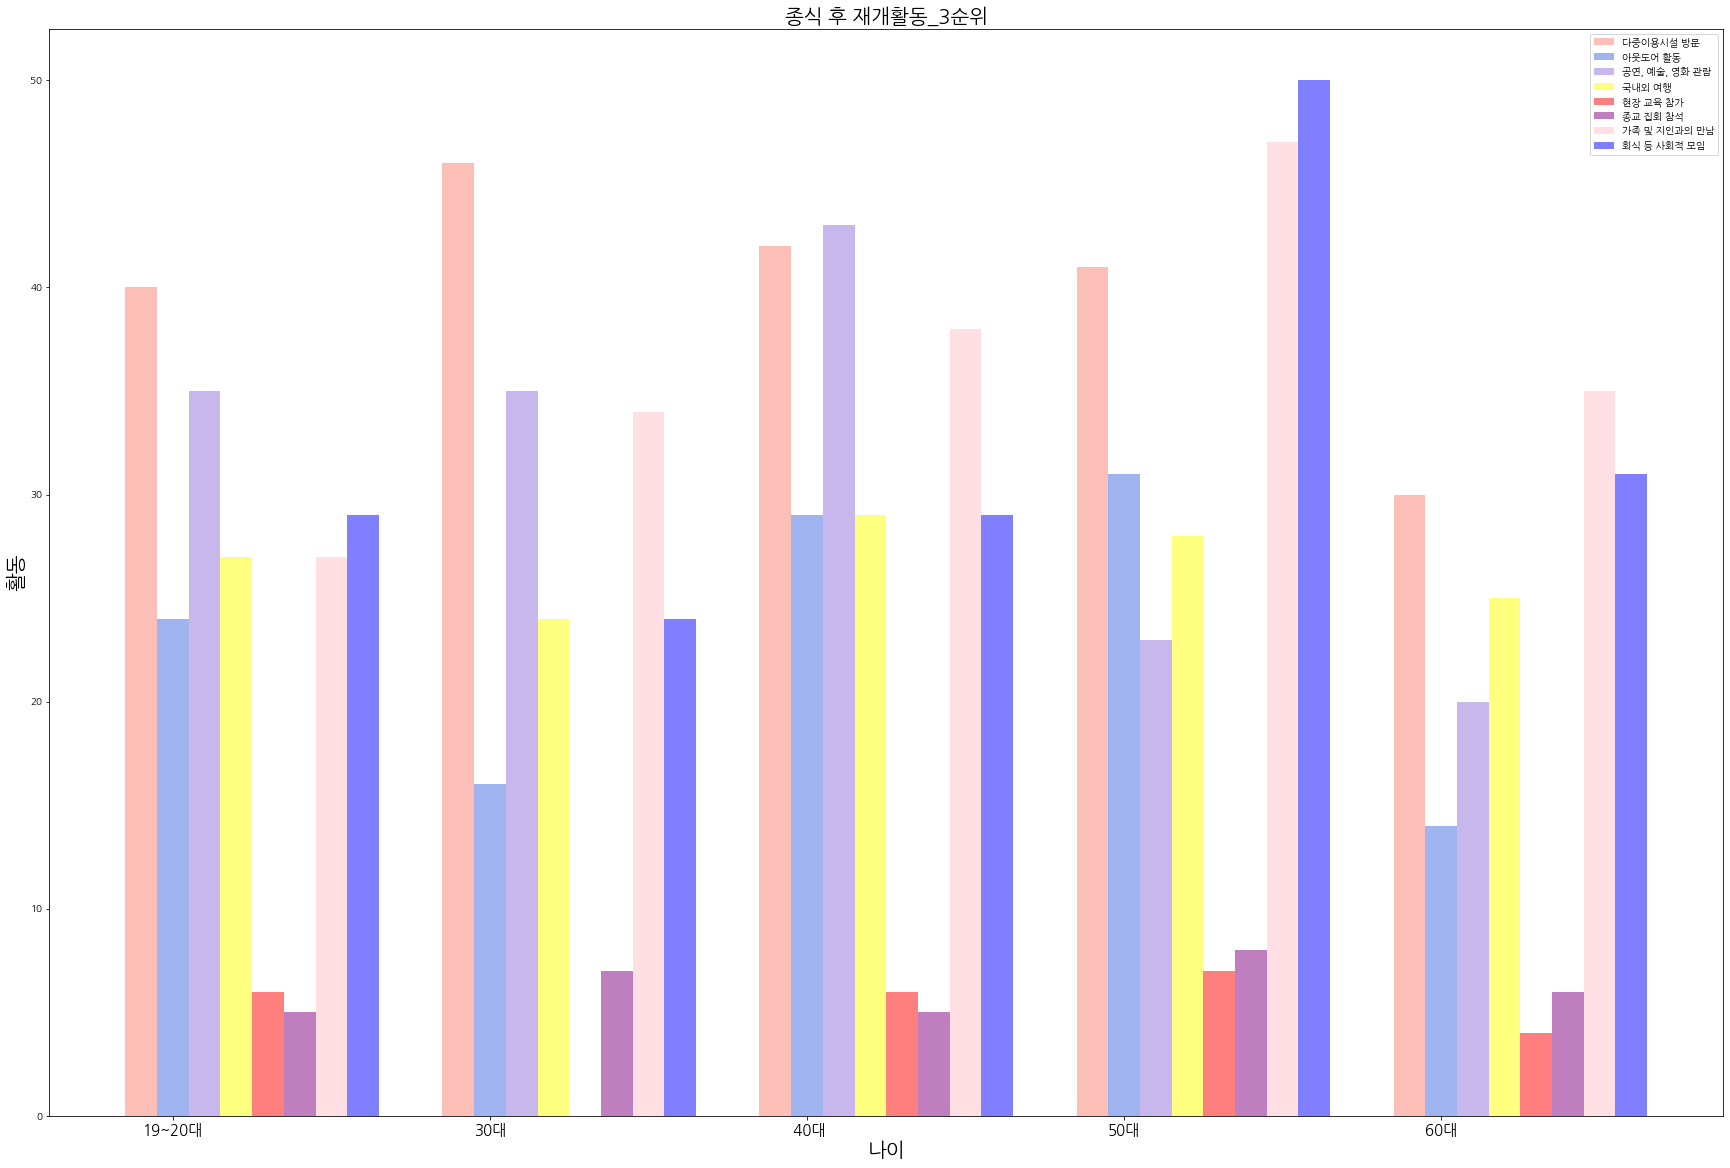

In [61]:
fig, ax = plt.subplots(figsize=(30,20))
bar_width = 0.1

index = np.arange(5)

b1 = plt.bar(index, df['다중이용시설 방문'], bar_width, alpha=0.5, color='salmon', label='다중이용시설 방문')
b2 = plt.bar(index + bar_width, df['아웃도어 활동'], bar_width, alpha=0.5, color='royalblue', label='아웃도어 활동')
b3 = plt.bar(index + 2 * bar_width, df['공연, 예술, 영화 관람'], bar_width, alpha=0.5, color='mediumpurple', label='공연, 예술, 영화 관람')
b4 = plt.bar(index + 3 * bar_width, df['국내외 여행'], bar_width, alpha=0.5, color='yellow', label='국내외 여행')
b5 = plt.bar(index + 4 * bar_width, df['현장 교육 참가'], bar_width, alpha=0.5, color='red', label='현장 교육 참가')
b6 = plt.bar(index + 5 * bar_width, df['종교 집회 참석'], bar_width, alpha=0.5, color='purple', label='종교 집회 참석')
b7 = plt.bar(index + 6 * bar_width, df['가족 및 지인과의 만남'], bar_width, alpha=0.5, color='pink', label='가족 및 지인과의 만남')
b8 = plt.bar(index + 7 * bar_width, df['회식 등 사회적 모임'], bar_width, alpha=0.5, color='blue', label='회식 등 사회적 모임')

plt.xticks(np.arange(bar_width, 5+ bar_width, 1), Age, fontsize=15)

plt.xlabel('나이', size = 20)
plt.ylabel('활동', size = 20)
plt.title('종식 후 재개활동_3순위', size=20)

plt.legend()
plt.show()